# Assignment 2: Stochastic and Spatial Models

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import gillespie as gil

### Gillespie’s Direct Algorithm and Stochastic Hallmarks

First, let's fix a random seed to ensure reproducibility.

In [53]:
np.random.seed(0)

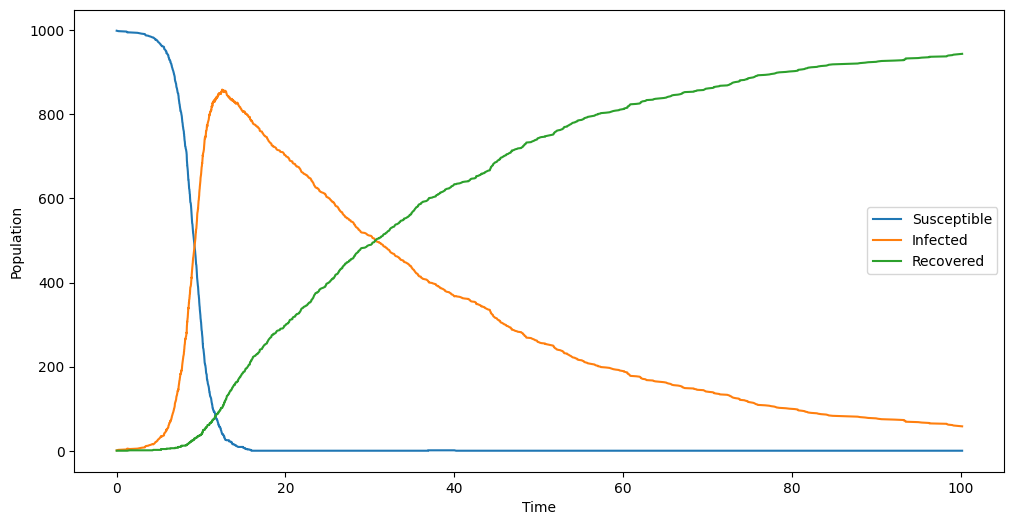

In [54]:
# Defining the parameters
beta = 1  # infection rate
gamma = 1/30  # recovery rate
mu = 1/60  # birth rate
nu = 0.01  # death rate
N = 1000  # total population

# Initial conditions
S0 = 999
I0 = 1
R0 = 0
t = 100 # duration

initial_conditions = [S0, I0, R0]

propensities = [lambda s, i, r: beta * s * i / N, # infection 
                        lambda s, i, r: gamma * i,   # recovery
                        lambda s, i, r: mu ,   # birth
                        lambda s, i, r: nu * s / N,  # death from susceptible group
                        lambda s, i, r: nu * i / N,  # death from infected group
                        lambda s, i, r: nu * r / N]  # death from recovered group

stoichiometry = [[-1, 1, 0],  # infection; Population change: S-1, I+1, R+0
                            [0, -1, 1],  # Recovery; Population change: S+0, I-1, R+1
                            [1, 0, 0],   # Birth: Population change: S+1, I+0, R+0 
                            [-1, 0, 0],  # Death in S; Population change: S-1, I+0, R+0
                            [0, -1, 0],  # Death in I; Population change: S+0, I-1, R+0
                            [0, 0, -1]] # Death in R; Population change: S+0, I+0, R-1

# Running the simulation
time, result = gil.simulate(initial_conditions, propensities, stoichiometry, t)
S, I, R = zip(*result)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(time, S, label='Susceptible')
plt.plot(time, I, label='Infected')
plt.plot(time, R, label='Recovered')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()